In [3]:
import torch
import torchvision
import numpy as np
import matplotlib
import matplotlib.cm as cm
import matplotlib.pyplot as plt

The shape of convolutional kernels is [n, c, h, w].

* n: number of input samples (images)
* c: channels of input feature maps
* h, w spatial size of input images

In [4]:
def plot_filter(model, layout=[5, 5]):
    H, W = layout
    fig, axes = plt.subplots(H, W)
    idx = 0
    for name, param in model.named_parameters():
        if 'weight' in name and len(param.shape) == 4 and 'downsample' not in name:
            weight = param.data.numpy()
            weight -= weight.min()
            weight /= max(weight.max(), 1e-6)
            weight = np.mean(np.mean(weight, axis=0), axis=0)
            ax = axes[idx // W, idx % W] 
            ax.imshow(weight, cmap=cm.jet)
            ax.set_xticks([])
            ax.set_yticks([])
            # ax.set_title(name, fontsize=5)
            idx += 1
    plt.axis('off')
    plt.tight_layout()
    plt.show()

I averaged conv-kernels at **n, c** axes and then visualize the average kernel,
they present some sort of symmetry.

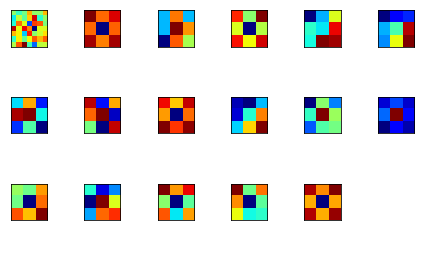

In [5]:
plot_filter(torchvision.models.resnet.resnet18(pretrained=True), [3, 6])

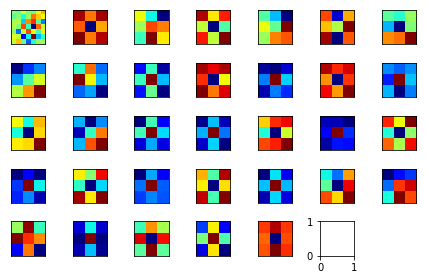

In [6]:
plot_filter(torchvision.models.resnet.resnet34(pretrained=True), [5, 7])

# SVD of kernel weights

In [85]:
def print_svd(model):
    line_new = "{:20} {:>14} {:>15} {:>15} {:>15}".format("Kernel shape", "min SV", "max SV", "mean SV", "std SV")
    print(line_new)
                                        
    for name, param in model.named_parameters():
        if 'weight' in name and len(param.shape) == 4 and 'downsample' not in name:
            weight = param.data
            U, S, V = torch.svd(weight.view(param.shape[0], -1))
            line_new = "{:20} {:>15} {:>15} {:>15} {:>15}".format(
                str(weight.numpy().shape),
                "{:.6f}".format(S.min()),
                "{:.6f}".format(S.max()),
                "{:.6f}".format(S.mean()),
                "{:.6f}".format(S.std()),
            )
            print(line_new)

## ResNet18

In [86]:
model = torchvision.models.resnet.resnet18(pretrained=True)
print_svd(model)

Kernel shape                 min SV          max SV         mean SV          std SV
(64, 3, 7, 7)               0.000000        4.127810        1.063828        1.167076
(64, 64, 3, 3)              0.322690        3.108985        1.081802        0.696484
(64, 64, 3, 3)              0.271689        2.163448        0.969313        0.491361
(64, 64, 3, 3)              0.467452        2.934300        1.093953        0.547519
(64, 64, 3, 3)              0.358101        1.936693        0.970050        0.420203
(128, 64, 3, 3)             0.300159        2.003958        0.898225        0.438057
(128, 128, 3, 3)            0.430476        2.404564        1.052827        0.477302
(128, 128, 3, 3)            0.506819        2.282305        1.081896        0.422707
(128, 128, 3, 3)            0.388547        2.965109        0.933154        0.415642
(256, 128, 3, 3)            0.254020        2.889916        0.852853        0.497754
(256, 256, 3, 3)            0.476275        2.678621        1.1108

## ResNet34

In [87]:
model = torchvision.models.resnet.resnet34(pretrained=True)
print_svd(model)

Kernel shape                 min SV          max SV         mean SV          std SV
(64, 3, 7, 7)               0.000000        3.973493        0.991103        1.123925
(64, 64, 3, 3)              0.220820        2.617781        0.856644        0.564922
(64, 64, 3, 3)              0.155292        1.871042        0.728377        0.414380
(64, 64, 3, 3)              0.311465        1.858232        0.808507        0.388240
(64, 64, 3, 3)              0.173047        1.622595        0.718955        0.381648
(64, 64, 3, 3)              0.329353        1.698452        0.795965        0.341816
(64, 64, 3, 3)              0.155844        1.490325        0.692161        0.339388
(128, 64, 3, 3)             0.217415        1.776666        0.744444        0.399051
(128, 128, 3, 3)            0.156828        2.039368        0.816293        0.450389
(128, 128, 3, 3)            0.285560        2.263824        0.748380        0.380865
(128, 128, 3, 3)            0.171928        1.968264        0.7088

## ResNet50

In [88]:
model = torchvision.models.resnet.resnet50(pretrained=True)
print_svd(model)

Kernel shape                 min SV          max SV         mean SV          std SV
(64, 3, 7, 7)               0.000000        3.820290        1.024195        1.096109
(64, 64, 1, 1)              0.000000        1.385159        0.387085        0.418492
(64, 64, 3, 3)              0.000000        1.969128        0.520536        0.471462
(256, 64, 1, 1)             0.000000        1.835355        0.425505        0.373566
(64, 256, 1, 1)             0.000000        1.234165        0.389628        0.300231
(64, 64, 3, 3)              0.200175        1.511813        0.599548        0.347154
(256, 64, 1, 1)             0.112166        1.182422        0.450040        0.263852
(64, 256, 1, 1)             0.107653        1.203937        0.392770        0.280328
(64, 64, 3, 3)              0.269148        1.631139        0.683151        0.342208
(256, 64, 1, 1)             0.094926        1.007083        0.428781        0.257331
(128, 256, 1, 1)            0.058655        1.661010        0.4377

## AlexNet (without bn)

In [92]:
model = torchvision.models.alexnet(pretrained=True)
print_svd(model)

Kernel shape                 min SV          max SV         mean SV          std SV
(64, 3, 11, 11)             0.206471        4.592607        1.809391        1.311658
(192, 64, 5, 5)             0.458008        5.535927        1.612217        0.982809
(384, 192, 3, 3)            0.427188        6.099567        1.253595        0.752255
(256, 384, 3, 3)            0.835276        6.406738        1.502814        0.641620
(256, 256, 3, 3)            0.540765        6.545052        1.124878        0.614995


## VGG16 (without bn)

In [93]:
model = torchvision.models.vgg16(pretrained=True)
print_svd(model)

Kernel shape                 min SV          max SV         mean SV          std SV
(64, 3, 3, 3)               0.067007        5.231642        1.334812        1.526919
(64, 64, 3, 3)              0.346622        3.468568        1.110053        0.757954
(128, 64, 3, 3)             0.234237        3.151973        0.960978        0.708947
(128, 128, 3, 3)            0.461391        2.825836        1.171760        0.581780
(256, 128, 3, 3)            0.267589        3.024736        0.906282        0.587673
(256, 256, 3, 3)            0.449137        3.507679        1.047891        0.542222
(256, 256, 3, 3)            0.491658        4.190733        1.100702        0.522899
(512, 256, 3, 3)            0.272543        3.737435        0.879042        0.549692
(512, 512, 3, 3)            0.434533        4.773206        0.992807        0.502233
(512, 512, 3, 3)            0.460019        6.164806        0.997814        0.486083
(512, 512, 3, 3)            0.461264        4.220067        1.0673

## VGG16-bn

In [94]:
model = torchvision.models.vgg16_bn(pretrained=True)
print_svd(model)

Kernel shape                 min SV          max SV         mean SV          std SV
(64, 3, 3, 3)               0.001752        4.010293        0.772110        1.244841
(64, 64, 3, 3)              0.000002        2.275260        0.658264        0.544591
(128, 64, 3, 3)             0.000000        3.344049        0.654922        0.688060
(128, 128, 3, 3)            0.000000        2.125844        0.858383        0.482852
(256, 128, 3, 3)            0.000000        2.279605        0.715559        0.514280
(256, 256, 3, 3)            0.121464        2.998530        0.858723        0.474269
(256, 256, 3, 3)            0.415390        2.918220        0.947250        0.425832
(512, 256, 3, 3)            0.105104        2.562731        0.789612        0.478278
(512, 512, 3, 3)            0.013820        3.725614        0.933794        0.482018
(512, 512, 3, 3)            0.013048        5.248336        0.967410        0.458266
(512, 512, 3, 3)            0.436562        3.404605        1.0344